In [4]:
jan = pd.read_csv('flights_january.csv')
feb = pd.read_csv('flights_february.csv')
mar = pd.read_csv('flights_march.csv')
apr = pd.read_csv('flights_april.csv')
may = pd.read_csv('flights_may.csv')
jun = pd.read_csv('flights_june.csv')
jul = pd.read_csv('flights_july.csv')
aug = pd.read_csv('flights_august.csv')
sept = pd.read_csv('flights_september.csv')
octob = pd.read_csv('flights_october.csv')
novem = pd.read_csv('flights_november.csv')
decem = pd.read_csv('flights_december.csv')

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import re

Flights = pd.read_csv('flights_20200201.csv', delimiter = ',')
Flights.sample(15)

# MASTER SCRIPT to run when all data is compiled into one file
# cleaning methods
master = master.replace('null', np.nan) # replace all null values with np.nan's
master['fly_score'] = master['fly_score'].str.replace('FlyScore ', '').astype(float) # extract string of fly score then convert to float
master['price'] = master['price'].str.replace('$', '').str.replace(',', '').astype(float) # convert $1,000 to 1000.0
master['airline'] = master['airline'].str[11:] # extract string of airline name
master.dropna(subset=['price','duration'], inplace=True) # drop all rows with nulls in price or duration (191)
master["departure_date"] = master['departure_date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d')) # convert integer to datetime
master.set_index(pd.Series(range(len(master.price))), inplace=True) # set index to 1 thru 91564
master2 = master.copy() # make new copy of master dataframe
master2 = master2.set_index('departure_date') # set departure date as datetime index
master.duration = master.duration.str.replace('h', '').str.replace(' ', '+').str.replace('m', '/60').apply(eval).round(2) # convert Xh Ym to hours in decimal

master2['Weekday Name'] = master2.index.weekday_name # make new column called weekday name based on datetime

,departure_date,price,airline,start_airport,end_airport,start_end_time,duration,fly_score
199,20200201,"$1,670","EWR - LHR, Finnair",EWR,LHR,9:30 PM - 9:10 AM+1,6h 40m,FlyScore 8.5
201,20200201,"$1,671","JFK - LHR, American",JFK,LHR,8:05 AM - 7:50 PM,6h 45m,FlyScore 8.0
103,20200201,$150,"JFK - SJU, JetBlue",JFK,SJU,3:00 PM - 7:53 PM,3h 53m,FlyScore 8.2
224,20200201,"$1,670","JFK - LHR, Finnair",JFK,LHR,8:15 PM - 8:10 AM+1,6h 55m,FlyScore 8.5
246,20200201,"$1,684","JFK - LHR, KLM",JFK,LHR,8:05 AM - 8:05 PM,7h 0m,FlyScore 6.2
214,20200201,"$1,670","EWR - LHR, Finnair",EWR,LHR,9:30 PM - 9:10 AM+1,6h 40m,FlyScore 8.5
193,20200201,$662,"JFK - LHR, Virgin Atlantic",JFK,LHR,11:00 PM - 11:00 AM+1,7h 0m,FlyScore 8.6
20,20200201,$239,"JFK - LAX, American",JFK,LAX,12:30 PM - 4:00 PM,6h 30m,FlyScore 7.9
94,20200201,$444,"LGA - MIA, American",LGA,MIA,5:30 PM - 8:58 PM,3h 28m,FlyScore 6.4
26,20200201,$94,"LGA - ORD, Spirit",LGA,ORD,8:40 AM - 10:28 AM,2h 48m,FlyScore 6.5


In [2]:
import os
import glob
import pandas as pd

extension = 'csv'
all_filenames = [i for i in glob.glob('flights_202003*.{}'.format(extension))]

#combine all files in the list
combined_csv = pd.concat([ pd.read_csv(f) for f in all_filenames ])

#export to csv
combined_csv.to_csv( "flights_march.csv", index=False, encoding='utf-8-sig')

df_march = pd.read_csv('flights_march.csv', delimiter = ',')
df_march = df_march.sort_values('departure_date')

# df_january # 01/27/20 - 01/31/20
# df_feb
# df_march
# df_april
# df_may
# df_june
# df_july
# df_august
# df_september
# df_october
# df_november
# df_december # 12/01/20 - 12/21/20

# master = pd.concat([df_january,df_feb,df_march,df_april,df_may,df_june,df_july,df_august,df_september,df_october,df_november,df_december], axis=0)

In [282]:
master2.groupby('end_airport')['price'].mean()
master3 = master2.copy

In [291]:
price_df = master2[['duration','fly_score']]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


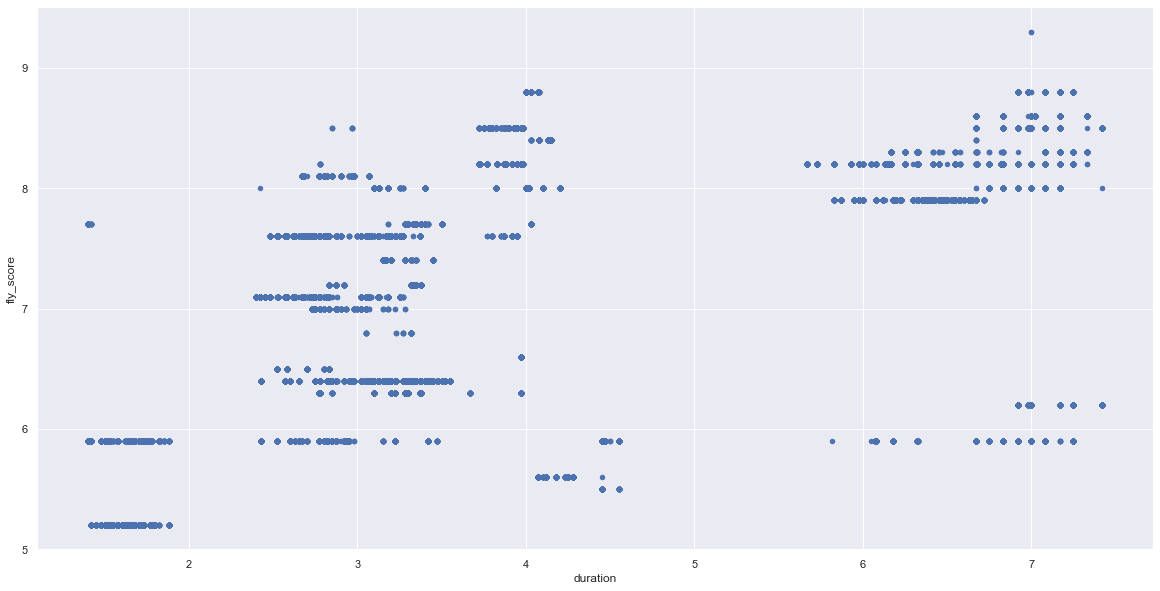

In [292]:
price_df.plot(kind='scatter', x='duration', y='fly_score')

Text(0.5, 1.0, 'Histogram of Price')

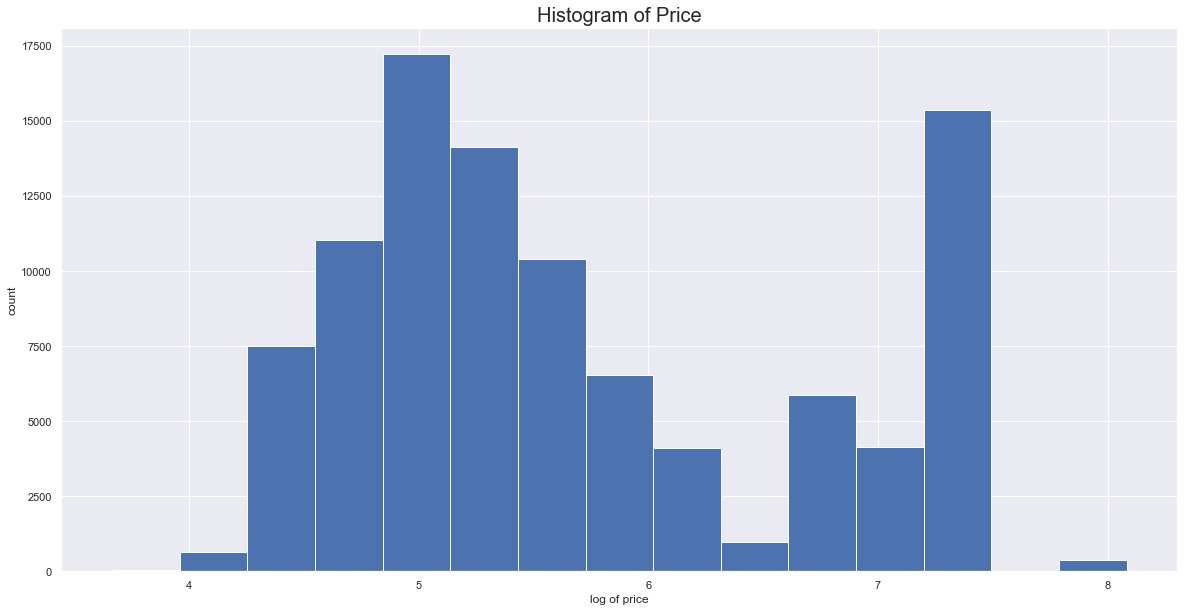

In [271]:
log_price = np.log(master2.price)
log_price.plot.hist(bins=15)

plt.xlabel('log of price')
plt.ylabel('count')
plt.title('Histogram of Price', fontsize=20)

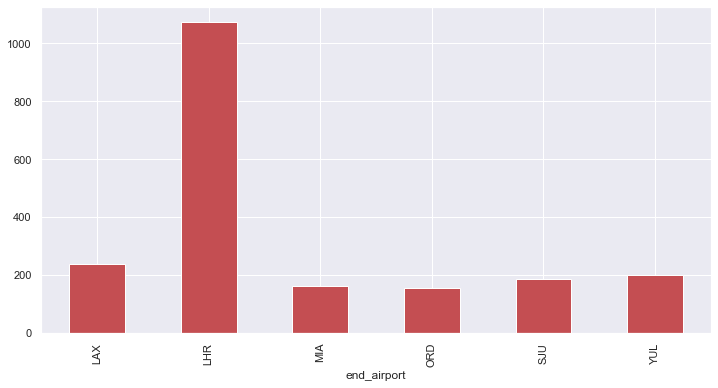

In [348]:
plt.figure(figsize=(12,6))
master2.groupby('end_airport')['price'].mean().plot.bar(color='r')

No handles with labels found to put in legend.


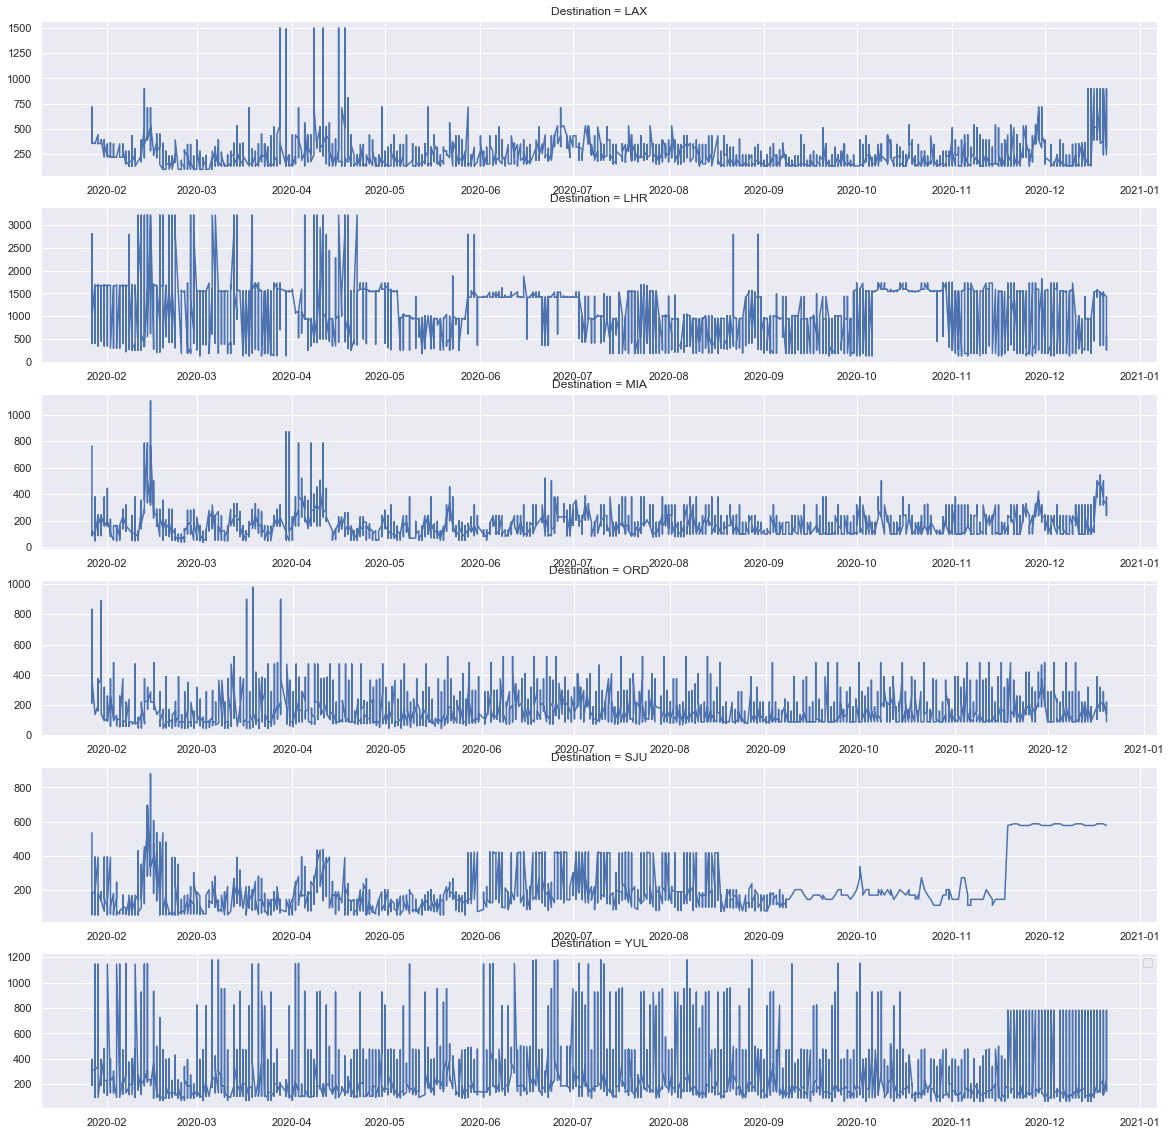

In [342]:
grouped = master2.groupby('end_airport')['price']
fig, axes = plt.subplots(figsize=(20,20), nrows=6, ncols=1)

x = master2.index
y = master2.price

targets = zip(grouped.groups.keys(), axes.flatten())
for (key, ax) in targets:
    ax.plot(grouped.get_group(key))
    ax.set_title('Destination = {}'.format(key))
    
ax.legend()
plt.show()

Text(0.5, 0, 'Destination')

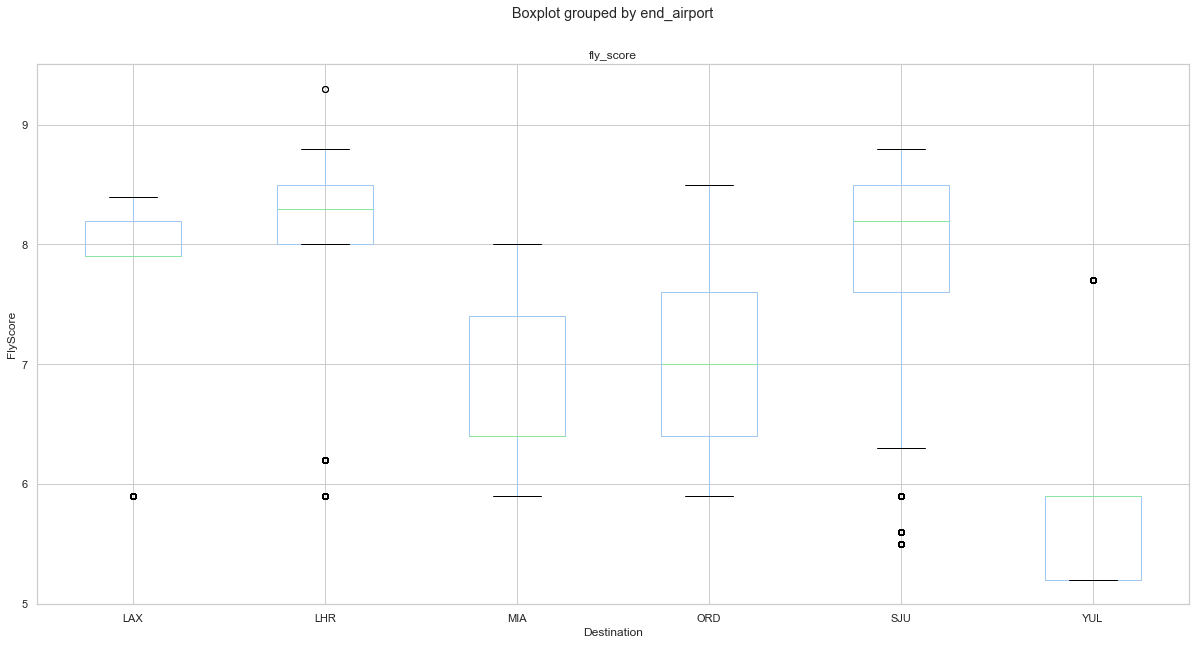

In [487]:
df = master2[['end_airport','fly_score']]
df.boxplot(by='end_airport', column='fly_score')
plt.ylabel('FlyScore')
plt.xlabel('Destination')

[Text(0.5, 0, 'Flight Prices ($)'),
 Text(0.5, 1.0, 'Distribution of Flight Prices')]

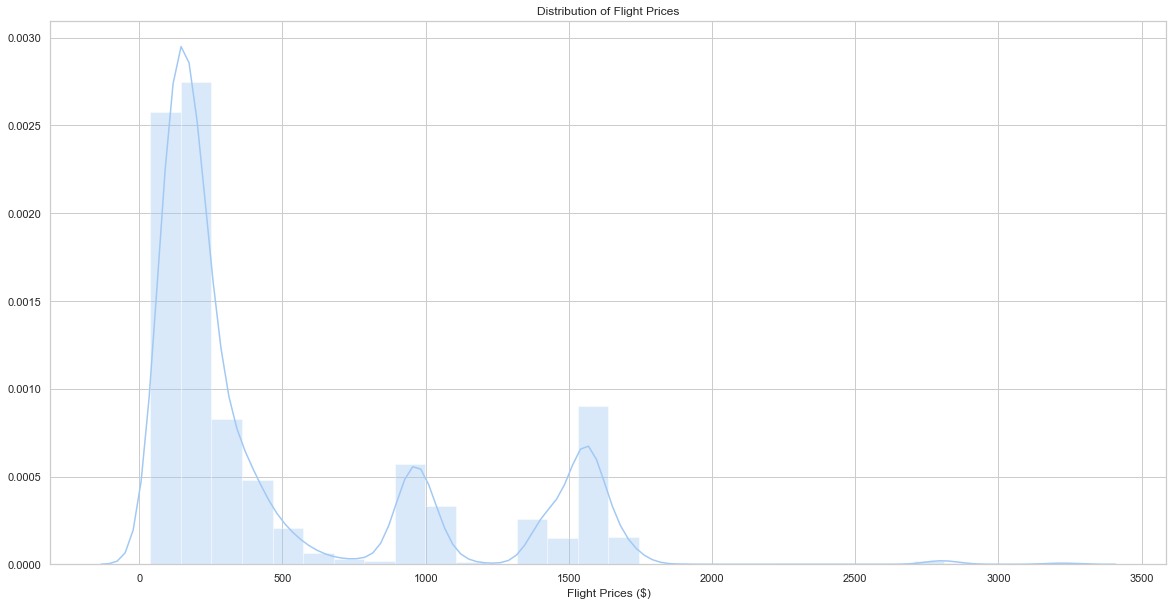

In [485]:
ax5 = sns.distplot(master2.price, bins=30)
ax5.set(title="Distribution of Flight Prices", xlabel='Flight Prices ($)')

AttributeError: 'FacetGrid' object has no attribute 'set_title'

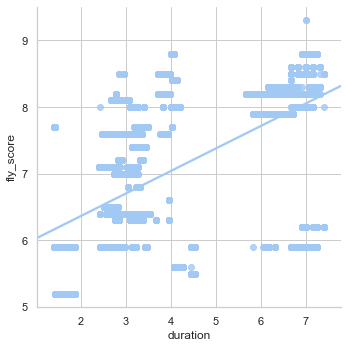

In [477]:
sns.set(style='whitegrid', palette='pastel')
ax1 = sns.lmplot(x='duration', y='fly_score', data=master2)
ax1.set_title('Price vs. Duration')
ax1.set_ylabel('Flight Price ($)')
ax1.set_xlabel('Destination')

Text(0.5, 0, 'Day of the Week')

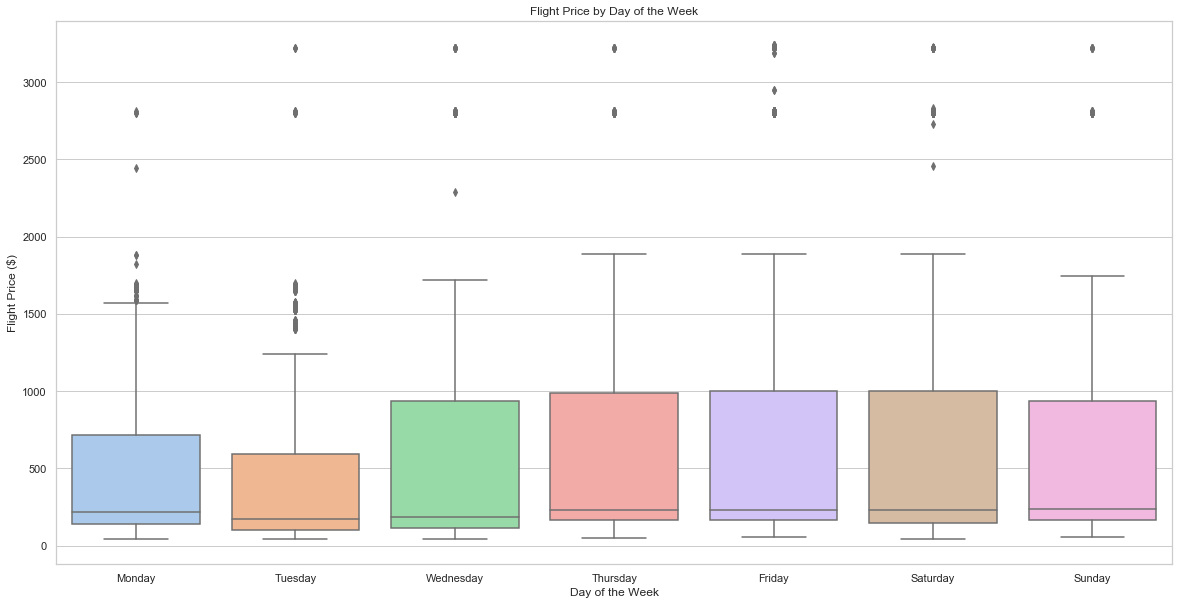

In [378]:
sns.set(style='whitegrid', palette='pastel')
ax1 = sns.boxplot(x='Weekday', y='price', data=master2)
ax1.set_title('Flight Price by Day of the Week')
ax1.set_ylabel('Flight Price ($)')
ax1.set_xlabel('Day of the Week')

[Text(0, 0.5, 'FlyScore out of 10'),
 Text(0.5, 0, 'Airline'),
 Text(0.5, 1.0, 'Average Airline FlyScores')]

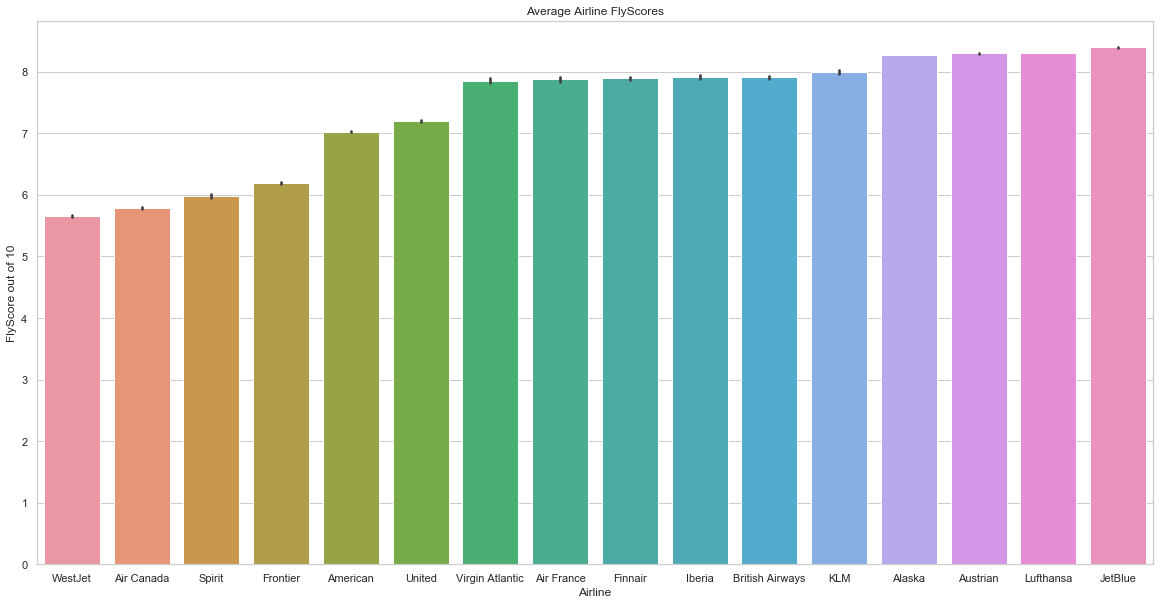

In [456]:
result = master2.groupby(["airline"])['fly_score'].aggregate(np.mean).reset_index().sort_values('fly_score')
ax4 = sns.barplot(x="airline", y="fly_score", data=master3, order=result['airline'])
ax4.set(title='Average Airline FlyScores', xlabel='Airline', ylabel='FlyScore out of 10')


In [426]:
master2.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='departure_date', length=98362)

In [419]:
master2

,price,airline,start_airport,end_airport,start_end_time,duration,fly_score,Weekday,month
departure_date,,,,,,,,,
2020-01-27,354.0,Alaska,EWR,LAX,7:20 PM - 10:53 PM,6.55,8.3,Monday,January
2020-01-27,354.0,Alaska,EWR,LAX,7:40 AM - 11:15 AM,6.58,8.2,Monday,January
2020-01-27,444.0,United,EWR,LAX,11:00 AM - 2:28 PM,6.47,7.9,Monday,January
2020-01-27,399.0,JetBlue,JFK,LAX,8:29 AM - 12:04 PM,6.58,NaN,Monday,January
2020-01-27,444.0,United,EWR,LAX,7:00 AM - 10:08 AM,6.13,8.2,Monday,January
...,...,...,...,...,...,...,...,...,...
2020-12-21,159.0,Air Canada,EWR,YUL,6:30 AM - 8:00 AM,1.50,5.9,Monday,December
2020-12-21,203.0,United,LGA,YUL,6:40 AM - 8:05 AM,1.42,5.9,Monday,December
2020-12-21,203.0,United,LGA,YUL,3:45 PM - 5:10 PM,1.42,5.9,Monday,December


[Text(0, 0.5, 'Flight Price ($)'),
 Text(0.5, 0, 'Time'),
 Text(0.5, 1.0, 'Daily Average Flight Prices from 2020-01-27 to 2020-12-21')]

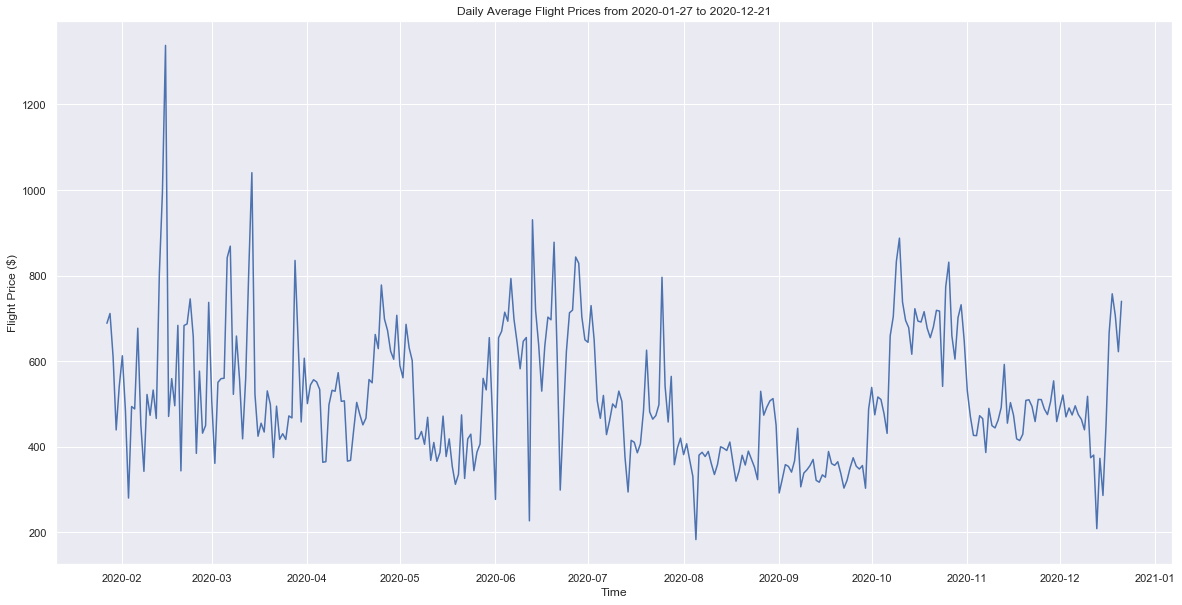

In [438]:
ax2 = sns.lineplot(x=master2.index, y='price', err_style=None, data=master2)
ax2.set(title='Daily Average Flight Prices from 2020-01-27 to 2020-12-21', xlabel='Time', ylabel='Flight Price ($)')